In [1]:
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['PT Sans']})
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Importing Data
LM22_data = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/LM22_source_GEPs.txt', index_col=0)
sc_data = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Spring/UROP 1100/Glioma_Deconvolution/Single cell mixture/Cibersortx_input.GBM_immune_expression_data.20210117.txt', index_col=0)

In [3]:
sc_mean = pd.read_table('/Users/dawonchoi/Jupyter Notebook/UROP/sc_mean.txt', index_col=0)
sc_mean

,CD4+ Tcm,CD4+ naive T,CD8+ effector T,CD8+ naive T,Cytotoxic CD4+ T,Cytotoxic NK,DC,Exhausted CD4+ T,Exhausted CD8+ T,Immature NK,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
MIR1302-2HG,0.000000,0.000000,0.019109,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AL627309.1,0.000000,0.000000,0.000000,0.000000,0.006463,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.005082,0.003263,0.000000,0.027515,0.0,0.002826,0.009843,0.000000
AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.001962,0.001364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AC240274.1,0.034142,0.010598,0.035071,0.021285,0.016466,0.040375,0.050069,0.015175,0.07412,0.0,...,0.0,0.04152,0.187214,0.117150,0.104159,0.031969,0.0,0.019135,0.015032,0.020118
AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [4]:
LM22_data

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,Tregs,T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
genesinput,,,,,,,,,,,,,,,,,,,,,
A1CF,444.697134,499.621456,317.348613,267.475035,215.012469,177.653603,198.202065,151.145578,314.057149,241.801924,...,324.736918,249.352507,177.247843,157.064662,286.283564,291.615607,177.061173,156.384893,175.711858,447.419792
A2M,20.303593,23.559923,45.836411,21.880510,18.571284,19.239029,14.907763,78.446628,25.610012,121.706537,...,46.855151,2219.315546,1754.337137,8093.642040,10348.016780,8135.849976,811.582253,1128.085055,14.729626,31.140838
A4GALT,33.212550,42.983330,127.584987,44.990740,142.182291,98.763554,37.624191,102.708901,132.722337,60.255684,...,37.963886,46.694701,225.982225,32.110449,33.738804,85.211562,116.196318,88.362818,128.379241,49.294028
A4GNT,381.468767,499.399737,289.693270,201.294509,219.494712,150.475450,138.457377,162.875904,438.231940,230.262539,...,118.781532,123.767691,133.795316,116.154351,184.168637,160.657301,150.437542,134.846499,241.288024,315.115501
AAAS,18.375534,21.251780,70.266151,169.849984,169.843772,134.594921,355.718387,308.876493,80.606421,36.430516,...,50.371451,94.856718,66.212237,214.691436,46.892563,20.903658,71.324451,24.165011,29.773100,25.741503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,153.851062,94.957767,104.211251,80.056476,92.357356,154.969401,99.093659,102.085948,33.134744,168.277885,...,63.641612,72.108540,105.954960,41.131297,119.142291,95.346385,6.612574,47.541959,38.868474,99.998775
ZXDC,56.249196,41.225592,30.533496,295.125513,486.174743,276.536158,156.481645,255.510178,145.633619,282.426443,...,419.601769,186.284599,223.024334,425.401814,150.866566,197.463758,675.401650,868.648763,2100.092573,491.686754
ZYX,512.873831,641.556952,635.943077,1518.436823,1052.262476,1462.503330,898.796961,1548.943526,2049.043355,862.255996,...,3525.805100,3054.904933,3680.103312,2850.795927,3113.178892,3349.461312,490.988738,769.976940,594.964701,4346.194889


In [5]:
sc_data

,Naive B,Naive B.1,Naive B.2,Naive B.3,Naive B.4,Naive B.5,Naive B.6,Naive B.7,Naive B.8,Naive B.9,...,DC.46,DC.47,DC.48,DC.49,DC.50,DC.51,DC.52,DC.53,DC.54,DC.55
MIR1302-2HG,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC233755.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC240274.1,0.0,0.0,0.0,0.0,0.991047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC213203.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
common = sc_mean.index.intersection(LM22_data.index)
common

Index(['NOC2L', 'ISG15', 'AGRN', 'C1orf159', 'TNFRSF4', 'SDF4', 'SCNN1D',
       'DVL1', 'MXRA8', 'AURKAIP1',
       ...
       'PCBP3', 'COL6A1', 'COL6A2', 'FTCD', 'LSS', 'MCM3AP-AS1', 'MCM3AP',
       'PCNT', 'S100B', 'PRMT2'],
      dtype='object', length=11008)

In [7]:
sc_filter = sc_mean
sc_filter = sc_filter[sc_filter.index.isin(common)]
sc_filter

,CD4+ Tcm,CD4+ naive T,CD8+ effector T,CD8+ naive T,Cytotoxic CD4+ T,Cytotoxic NK,DC,Exhausted CD4+ T,Exhausted CD8+ T,Immature NK,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
NOC2L,0.218626,0.221249,0.176545,0.293630,0.154288,0.246762,0.189324,0.146501,0.169011,0.193702,...,0.000000,0.141556,0.131517,0.178647,0.135105,0.276451,0.206486,0.189339,0.213855,0.130003
ISG15,0.644815,0.424748,0.771563,0.465159,0.655463,0.519817,0.235819,0.662711,0.634220,0.377917,...,0.000000,0.174710,0.154601,0.303718,0.967788,0.124299,0.571719,0.691141,0.517149,0.799323
AGRN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020072,0.023824,0.000000,0.037061,0.015875,0.000000,0.000000,0.000000
C1orf159,0.031031,0.011861,0.000000,0.000000,0.029179,0.019828,0.000000,0.028925,0.000000,0.023095,...,0.000000,0.000000,0.028287,0.027756,0.081107,0.000000,0.034742,0.036154,0.023206,0.036122
TNFRSF4,0.168247,0.110503,0.036818,0.000000,0.020363,0.000000,0.032669,0.086020,0.331519,0.187114,...,0.000000,0.000000,0.026429,0.022332,0.000000,0.000000,0.000000,0.080467,0.199034,0.991746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCM3AP-AS1,0.024731,0.081588,0.096552,0.078934,0.030389,0.020691,0.000000,0.000000,0.060118,0.000000,...,0.000000,0.016249,0.008836,0.007411,0.000000,0.037665,0.018338,0.016578,0.057688,0.000000
MCM3AP,0.139405,0.175068,0.092857,0.146283,0.103347,0.218215,0.189365,0.181018,0.300743,0.219240,...,0.000000,0.113804,0.240854,0.208262,0.281903,0.207678,0.162192,0.136612,0.118185,0.192656
PCNT,0.062883,0.079797,0.068210,0.107840,0.094691,0.138672,0.141145,0.120496,0.276744,0.188792,...,0.000000,0.088308,0.129837,0.115702,0.057846,0.066921,0.172984,0.087944,0.082036,0.084169
S100B,0.031180,0.024444,0.032753,0.065862,0.000000,0.107531,0.136398,0.007336,0.000000,0.027353,...,0.000000,0.000000,0.120757,0.182284,0.000000,0.044577,0.273258,0.013728,0.008589,0.024312


In [8]:
LM22_filter = LM22_data
LM22_filter = LM22_filter[LM22_filter.index.isin(common)]
LM22_filter

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,Tregs,T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
genesinput,,,,,,,,,,,,,,,,,,,,,
A1CF,444.697134,499.621456,317.348613,267.475035,215.012469,177.653603,198.202065,151.145578,314.057149,241.801924,...,324.736918,249.352507,177.247843,157.064662,286.283564,291.615607,177.061173,156.384893,175.711858,447.419792
A2M,20.303593,23.559923,45.836411,21.880510,18.571284,19.239029,14.907763,78.446628,25.610012,121.706537,...,46.855151,2219.315546,1754.337137,8093.642040,10348.016780,8135.849976,811.582253,1128.085055,14.729626,31.140838
A4GALT,33.212550,42.983330,127.584987,44.990740,142.182291,98.763554,37.624191,102.708901,132.722337,60.255684,...,37.963886,46.694701,225.982225,32.110449,33.738804,85.211562,116.196318,88.362818,128.379241,49.294028
A4GNT,381.468767,499.399737,289.693270,201.294509,219.494712,150.475450,138.457377,162.875904,438.231940,230.262539,...,118.781532,123.767691,133.795316,116.154351,184.168637,160.657301,150.437542,134.846499,241.288024,315.115501
AAAS,18.375534,21.251780,70.266151,169.849984,169.843772,134.594921,355.718387,308.876493,80.606421,36.430516,...,50.371451,94.856718,66.212237,214.691436,46.892563,20.903658,71.324451,24.165011,29.773100,25.741503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,83.495313,90.271544,97.090451,135.179940,227.598349,136.961868,49.814260,168.598770,5.682230,65.111616,...,49.873562,9.546960,119.336111,76.507549,36.944557,96.902738,80.331367,6.771935,179.238388,66.114198
ZXDB,153.851062,94.957767,104.211251,80.056476,92.357356,154.969401,99.093659,102.085948,33.134744,168.277885,...,63.641612,72.108540,105.954960,41.131297,119.142291,95.346385,6.612574,47.541959,38.868474,99.998775
ZXDC,56.249196,41.225592,30.533496,295.125513,486.174743,276.536158,156.481645,255.510178,145.633619,282.426443,...,419.601769,186.284599,223.024334,425.401814,150.866566,197.463758,675.401650,868.648763,2100.092573,491.686754


In [9]:
LM22_rank_mean = LM22_filter.stack().groupby(LM22_filter.rank(method='first').stack().astype(int)).mean()
LM22_quan = LM22_filter.rank(method='min').stack().astype(int).map(LM22_rank_mean).unstack()
LM22_quan

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,Tregs,T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
genesinput,,,,,,,,,,,,,,,,,,,,,
A1CF,452.828706,512.152708,327.464317,266.893195,219.281201,180.816026,201.551182,152.086867,305.267171,227.211450,...,324.783833,251.463594,179.509442,156.859549,286.368027,290.154539,176.728946,157.069037,170.251789,462.009667
A2M,21.198780,24.599386,46.209851,23.122001,19.155895,21.130063,16.773403,80.425250,21.096857,109.464716,...,49.328433,2178.124252,1714.841149,7907.372837,10379.971287,8546.324210,806.077020,1115.270486,12.762110,27.693665
A4GALT,35.027361,42.977435,127.241663,47.122699,148.744204,100.962434,40.491222,105.662915,125.438285,48.209919,...,40.380856,49.356407,227.157614,35.637194,35.361450,85.669088,117.162835,88.836264,122.257307,44.764281
A4GNT,388.671366,511.924806,298.365200,205.431527,223.663734,153.311161,139.278829,162.450407,425.019821,216.023135,...,121.349193,125.358462,134.964994,117.661743,183.399903,160.940615,149.998419,134.891587,236.226861,322.471966
AAAS,19.427806,22.101791,69.554334,175.068460,175.187178,137.564506,359.847265,309.454810,71.969517,27.455784,...,52.525574,96.391351,69.611502,215.721255,49.719985,21.010216,72.020922,23.453109,24.817057,23.057053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,83.002087,88.472177,96.068098,138.792718,231.678532,140.005891,52.272234,168.470818,5.121725,53.488222,...,52.017713,10.046008,122.257307,79.981331,39.317092,97.600336,80.698903,6.879394,173.483618,61.453177
ZXDB,154.378728,93.706410,103.230891,83.002087,98.223694,158.709348,101.435379,104.976530,26.464626,155.368620,...,65.889716,74.123932,108.020645,45.077877,121.193766,96.013610,6.232538,47.163949,32.609082,96.501567
ZXDC,56.387108,41.404014,30.503948,296.393027,488.600400,278.689580,159.235134,256.246508,137.279178,267.995982,...,420.433935,187.632010,223.974211,420.343528,151.522357,197.388393,666.914357,853.010172,2006.579399,509.928149


In [10]:
sc_rank_mean = sc_filter.stack().groupby(sc_filter.rank(method='first').stack().astype(int)).mean()
sc_quan = sc_filter.rank(method='min').stack().astype(int).map(sc_rank_mean).unstack()
sc_quan

,CD4+ Tcm,CD4+ naive T,CD8+ effector T,CD8+ naive T,Cytotoxic CD4+ T,Cytotoxic NK,DC,Exhausted CD4+ T,Exhausted CD8+ T,Immature NK,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
NOC2L,0.235238,0.278981,0.178838,0.343635,0.155401,0.222854,0.167542,0.142016,0.132411,0.175562,...,0.000000,0.150759,0.110068,0.152722,0.118583,0.335741,0.193373,0.179549,0.231469,0.116175
ISG15,0.712278,0.542753,0.810406,0.551795,0.668497,0.503505,0.209740,0.656042,0.505144,0.378576,...,0.000000,0.190653,0.131565,0.295342,0.934528,0.139938,0.572373,0.690875,0.600100,0.747730
AGRN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009099,0.012429,0.000000,0.043530,0.010334,0.000000,0.000000,0.000000
C1orf159,0.030058,0.010401,0.000000,0.000000,0.027137,0.015975,0.000000,0.024809,0.000000,0.016159,...,0.000000,0.000000,0.016114,0.015401,0.078075,0.000000,0.030078,0.028815,0.020372,0.030344
TNFRSF4,0.180551,0.126064,0.043348,0.000000,0.018339,0.000000,0.024222,0.081613,0.276403,0.169865,...,0.000000,0.000000,0.015193,0.010769,0.000000,0.000000,0.000000,0.073532,0.214622,0.945837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCM3AP-AS1,0.023511,0.093512,0.101483,0.086420,0.028607,0.018029,0.000000,0.000000,0.042274,0.000000,...,0.000000,0.013056,0.002379,0.001604,0.000000,0.047147,0.015186,0.013093,0.061797,0.000000
MCM3AP,0.150001,0.200317,0.098376,0.158424,0.103414,0.197609,0.167602,0.174245,0.226679,0.199315,...,0.000000,0.122396,0.211539,0.177500,0.276278,0.227576,0.153224,0.128879,0.128549,0.170492
PCNT,0.066928,0.091365,0.072006,0.118420,0.094247,0.122156,0.125507,0.116961,0.208516,0.171308,...,0.000000,0.093471,0.108161,0.094843,0.046177,0.075499,0.161551,0.080693,0.087511,0.074901
S100B,0.030300,0.026248,0.031275,0.073828,0.000000,0.095564,0.121711,0.004722,0.000000,0.019454,...,0.000000,0.000000,0.100425,0.156171,0.000000,0.059689,0.278539,0.010483,0.006226,0.019713


In [11]:
LM22_zscore = stats.zscore(LM22_quan, axis=1)
LM22_znormed = pd.DataFrame(LM22_zscore, index=LM22_quan.index, columns=LM22_quan.columns)
LM22_znormed

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,Tregs,T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
genesinput,,,,,,,,,,,,,,,,,,,,,
A1CF,1.900467,2.480416,0.674908,0.082767,-0.382686,-0.758721,-0.556014,-1.039576,0.457910,-0.305160,...,0.648704,-0.068072,-0.771494,-0.992918,0.273152,0.310169,-0.798676,-0.990870,-0.861996,1.990219
A2M,-0.490255,-0.489135,-0.482017,-0.489622,-0.490928,-0.490278,-0.491713,-0.470748,-0.490289,-0.461183,...,-0.480990,0.220189,0.067593,2.107277,2.921697,2.317734,-0.231734,-0.129892,-0.493034,-0.488116
A4GALT,-0.915404,-0.752715,0.971652,-0.667887,1.411677,0.433879,-0.803593,0.530069,0.934748,-0.645639,...,-0.805851,-0.622177,3.016314,-0.902925,-0.908567,0.120919,0.765401,0.185731,0.869654,-0.716150
A4GNT,1.633245,2.767991,0.801831,-0.053773,0.114084,-0.533624,-0.662815,-0.449483,1.967891,0.043740,...,-0.827886,-0.790974,-0.702530,-0.861835,-0.256609,-0.463383,-0.564123,-0.703206,0.229748,1.023773
AAAS,-0.890813,-0.861876,-0.348371,0.793445,0.794730,0.387598,2.793021,2.247701,-0.322235,-0.803939,...,-0.532647,-0.057955,-0.347752,1.233368,-0.563007,-0.873689,-0.321679,-0.847253,-0.832493,-0.851539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,-0.089768,0.008098,0.143997,0.908387,2.570215,0.930092,-0.639558,1.439360,-1.483132,-0.617803,...,-0.644112,-1.395031,0.612551,-0.143812,-0.871340,0.171411,-0.130974,-1.451685,1.529045,-0.475301
ZXDB,1.691596,0.209182,0.441894,-0.052358,0.319553,1.797406,0.398024,0.484546,-1.433745,1.715782,...,-0.470467,-0.269280,0.558923,-0.978965,0.880784,0.265554,-1.928078,-0.927996,-1.283617,0.277476
ZXDC,-0.791178,-0.828036,-0.854849,-0.200781,0.272035,-0.244331,-0.538180,-0.299539,-0.592190,-0.270636,...,0.104350,-0.468326,-0.378926,0.104128,-0.557153,-0.444326,0.710674,1.168456,4.006151,0.324499


In [12]:
sc_zscore = stats.zscore(sc_quan, axis=1)
sc_znormed = pd.DataFrame(sc_zscore, index=sc_quan.index, columns=sc_quan.columns)
sc_znormed

,CD4+ Tcm,CD4+ naive T,CD8+ effector T,CD8+ naive T,Cytotoxic CD4+ T,Cytotoxic NK,DC,Exhausted CD4+ T,Exhausted CD8+ T,Immature NK,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
NOC2L,0.691145,1.279741,-0.067764,2.149714,-0.383129,0.524505,-0.219768,-0.563238,-0.692486,-0.111841,...,-2.474181,-0.445595,-0.993123,-0.419181,-0.878541,2.043501,0.127813,-0.058192,0.640433,-0.910943
ISG15,0.796754,0.114721,1.191540,0.151100,0.620615,-0.043181,-1.225056,0.570506,-0.036587,-0.545793,...,-2.068879,-1.301846,-1.539569,-0.880662,1.690911,-1.505880,0.233888,0.710644,0.345440,0.939383
AGRN,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,-0.429182,...,-0.429182,-0.429182,0.526414,0.876203,-0.429182,4.142487,0.656113,-0.429182,-0.429182,-0.429182
C1orf159,0.744267,-0.378278,-0.972228,-0.972228,0.577469,-0.059958,-0.972228,0.444527,-0.972228,-0.049449,...,-0.972228,-0.972228,-0.051999,-0.092723,3.486355,-0.972228,0.745390,0.673304,0.191163,0.760595
TNFRSF4,0.399429,0.128346,-0.283177,-0.498840,-0.407602,-0.498840,-0.378332,-0.092801,0.876306,0.346265,...,-0.498840,-0.498840,-0.423251,-0.445263,-0.498840,-0.498840,-0.498840,-0.133007,0.568935,4.206845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCM3AP-AS1,-0.095685,2.128576,2.381862,1.903222,0.066247,-0.269876,-0.842742,-0.842742,0.500495,-0.842742,...,-0.842742,-0.427905,-0.767143,-0.791771,-0.842742,0.655354,-0.360208,-0.426704,1.120854,-0.842742
MCM3AP,-0.269916,0.643919,-1.207541,-0.116936,-1.116052,0.594751,0.049758,0.170410,1.122717,0.625733,...,-2.994275,-0.771291,0.847743,0.229515,2.023551,1.139018,-0.211383,-0.653549,-0.659547,0.102244
PCNT,-0.804040,-0.225467,-0.683816,0.415109,-0.157221,0.503560,0.582904,0.380575,2.548282,1.667316,...,-2.388670,-0.175596,0.172207,-0.143116,-1.295356,-0.601109,1.436312,-0.478143,-0.316716,-0.615276
S100B,-0.281594,-0.342684,-0.266890,0.374618,-0.738383,0.702303,1.096481,-0.667200,-0.738383,-0.445098,...,-0.738383,-0.738383,0.775577,1.615984,-0.738383,0.161466,3.460745,-0.580353,-0.644523,-0.441205


In [13]:
result = pd.concat([LM22_znormed.loc[common,:], sc_znormed.loc[common,:]], axis=1).corr()
result

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,Tregs,T cells gamma delta,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
B cells naive,1.000000,0.805704,0.196347,-0.120463,-0.205445,-0.060846,-0.236887,-0.236068,0.020545,0.116001,...,0.062474,0.196854,0.061065,0.014923,-0.031644,0.200203,-0.084210,-0.107132,-0.012636,-0.060471
B cells memory,0.805704,1.000000,0.251046,-0.066739,-0.175253,-0.005141,-0.176883,-0.215672,0.040006,0.115768,...,0.008160,0.260048,0.004246,-0.031797,-0.025037,0.188027,-0.074221,-0.081890,0.002184,-0.033506
Plasma cells,0.196347,0.251046,1.000000,-0.073236,-0.148909,-0.049423,-0.032030,-0.143089,-0.028734,-0.030166,...,-0.008285,0.058199,0.020432,0.030396,-0.031465,0.023468,-0.024486,0.001793,0.010752,0.003636
T cells CD8,-0.120463,-0.066739,-0.073236,1.000000,0.423724,0.554504,0.097747,0.249684,-0.035037,0.079313,...,-0.222642,-0.018264,-0.335127,-0.361768,0.040588,-0.023843,0.120291,0.150049,0.206008,0.019753
T cells CD4 naive,-0.205445,-0.175253,-0.148909,0.423724,1.000000,0.290224,0.015299,0.368884,0.052250,0.028887,...,-0.151886,0.035963,-0.229375,-0.264794,0.004784,0.036114,0.050105,0.082589,0.172112,0.023796
T cells CD4 memory resting,-0.060846,-0.005141,-0.049423,0.554504,0.290224,1.000000,0.181663,0.207970,0.030185,0.058413,...,-0.184607,-0.026321,-0.298936,-0.313547,0.015161,-0.038299,0.053247,0.228196,0.278106,0.073218
T cells CD4 memory activated,-0.236887,-0.176883,-0.032030,0.097747,0.015299,0.181663,1.000000,0.169049,-0.071647,-0.108752,...,-0.146895,-0.034108,-0.246002,-0.202812,0.009008,-0.042879,0.080478,0.152209,0.101266,0.091642
T cells follicular helper,-0.236068,-0.215672,-0.143089,0.249684,0.368884,0.207970,0.169049,1.000000,-0.009691,-0.053077,...,-0.150109,-0.023990,-0.218348,-0.242388,-0.015137,-0.038356,0.086073,0.116530,0.091236,0.150652
Tregs,0.020545,0.040006,-0.028734,-0.035037,0.052250,0.030185,-0.071647,-0.009691,1.000000,0.018796,...,-0.039072,-0.046688,-0.107185,-0.103279,-0.006512,-0.048354,0.026570,0.055937,0.045987,0.181526
T cells gamma delta,0.116001,0.115768,-0.030166,0.079313,0.028887,0.058413,-0.108752,-0.053077,0.018796,1.000000,...,-0.066643,-0.043688,-0.136218,-0.140059,0.020148,-0.047475,0.092302,0.048202,0.062888,-0.008780


In [14]:
final = result.iloc[0:22,22:44]
final

,CD4+ Tcm,CD4+ naive T,CD8+ effector T,CD8+ naive T,Cytotoxic CD4+ T,Cytotoxic NK,DC,Exhausted CD4+ T,Exhausted CD8+ T,Immature NK,...,Macrophage,Memory B,Microglia,Monocyte,NKT,Naive B,T gamma delta,Th1-like CD4+ Tem,Th17-like CD4+ Tem,Treg
B cells naive,-0.086804,0.036462,-0.093801,-0.018658,-0.055138,-0.057250,-0.017968,-0.066340,-0.060541,0.002974,...,0.062474,0.196854,0.061065,0.014923,-0.031644,0.200203,-0.084210,-0.107132,-0.012636,-0.060471
B cells memory,-0.059612,0.030721,-0.073187,-0.003930,-0.032552,-0.064664,-0.030543,-0.040929,-0.044700,-0.008009,...,0.008160,0.260048,0.004246,-0.031797,-0.025037,0.188027,-0.074221,-0.081890,0.002184,-0.033506
Plasma cells,-0.001811,-0.032483,-0.018244,-0.011166,-0.024017,-0.020699,-0.002935,-0.016749,0.003823,-0.003431,...,-0.008285,0.058199,0.020432,0.030396,-0.031465,0.023468,-0.024486,0.001793,0.010752,0.003636
T cells CD8,0.166273,0.222429,0.138018,0.240713,0.128912,0.061816,-0.275563,0.118144,0.039117,0.065322,...,-0.222642,-0.018264,-0.335127,-0.361768,0.040588,-0.023843,0.120291,0.150049,0.206008,0.019753
T cells CD4 naive,0.132794,0.280567,0.041741,0.208824,0.064339,0.003172,-0.206164,0.071152,0.004984,0.019966,...,-0.151886,0.035963,-0.229375,-0.264794,0.004784,0.036114,0.050105,0.082589,0.172112,0.023796
T cells CD4 memory resting,0.223778,0.260853,0.086452,0.195663,0.159783,-0.014349,-0.251678,0.128094,-0.013652,-0.009295,...,-0.184607,-0.026321,-0.298936,-0.313547,0.015161,-0.038299,0.053247,0.228196,0.278106,0.073218
T cells CD4 memory activated,0.127356,0.070379,0.093353,0.100659,0.075610,-0.014625,-0.112855,0.106930,0.103411,-0.006932,...,-0.146895,-0.034108,-0.246002,-0.202812,0.009008,-0.042879,0.080478,0.152209,0.101266,0.091642
T cells follicular helper,0.102073,0.139254,0.031026,0.102702,0.080386,-0.001099,-0.177186,0.161009,0.091407,0.025448,...,-0.150109,-0.023990,-0.218348,-0.242388,-0.015137,-0.038356,0.086073,0.116530,0.091236,0.150652
Tregs,0.083308,0.053578,-0.000305,0.011597,0.028137,-0.010049,-0.078325,0.065154,0.041215,0.021327,...,-0.039072,-0.046688,-0.107185,-0.103279,-0.006512,-0.048354,0.026570,0.055937,0.045987,0.181526
T cells gamma delta,0.060996,0.047288,0.096793,0.058941,0.089833,0.099401,-0.140275,0.034091,0.012889,0.052013,...,-0.066643,-0.043688,-0.136218,-0.140059,0.020148,-0.047475,0.092302,0.048202,0.062888,-0.008780


<Figure size 1440x720 with 0 Axes>

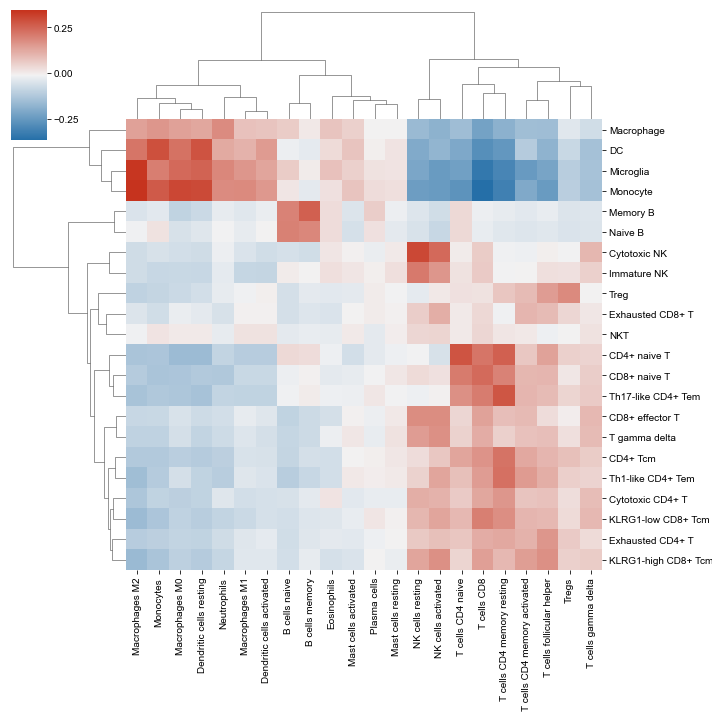

In [15]:
cmap = sns.diverging_palette(245,15, 90, 45, as_cmap=True, center='light')

plt.figure(figsize=(20,10))
# sns.heatmap(final.T, cmap=cmap, vmin=-0.4, vmax=0.4)
ax = sns.clustermap(final.T, cmap=cmap)
# ax.ax_cbar.set_position((1, .8, .04, 0.15))
ax = sns.set(font_scale=1.5)
# ax = sns.set_style({'font.family':'serif', 'font.serif':'Calibri'})
# ax.fig.subplots_adjust(right=0.7)
